In [1]:
from pathlib import Path

In [ ]:
plot_base_path = Path(
    "/Users/larsankile/Library/CloudStorage/Dropbox/Apps/Overleaf/[CoRL 24] Robust Assembly from RL/fig"
)

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

# Analyze Distillation Scaling


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(
    "/data/scratch/ankile/robust-rearrangement/notebooks/data/scaling_low_1.csv"
)


df = df[["Name", "best_success_rate", "success_rate"]]

df.head()

In [ ]:
df = df.assign(group_name=df.Name.str.split("-").str[:-1].str.join("-"))

df.head()

In [ ]:
df = df.groupby("group_name").mean().reset_index()

df

# Results 4.2 -- Scaling and BC/RL Distillation

## Scaling


In [ ]:
import wandb
import matplotlib.pyplot as plt

In [ ]:
api = wandb.Api(overrides={"entity": "robust-assembly"})

In [ ]:
run_ids = dict(
    state_1k="45i0dikc",
    state_10k="mm93m3qx",
    state_50k="8joapjpv",
    state_100k="wi6t4u51",
)

project = "ol-vision-scaling-low-1"

In [ ]:
# Get a project
runs = {name: api.run(f"{project}/{run_id}") for name, run_id in run_ids.items()}

In [ ]:
best_success_rates = {
    name: run.summary["best_success_rate"] for name, run in runs.items()
}

best_success_rates

In [ ]:
bc_success_rate = 0.54
rl_success_rate = 0.95

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font family to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Data
num_demonstrations = [50, 1000, 10000]
distilled_success_rate = [54, 70, 77]
rl_success_rate = 95
bc_success_rate = 54

# Create the line plot
plt.figure(figsize=(4, 3.5))

plt.axhline(
    y=rl_success_rate,
    linestyle="--",
    linewidth=3,
    color="#2398DA",
    label="RL policy success rate",
)

plt.axhline(
    y=bc_success_rate,
    linestyle="--",
    linewidth=3,
    color="#6B529C",
    label="BC policy success rate",
)

plt.plot(
    num_demonstrations,
    distilled_success_rate,
    marker="o",
    linestyle="-",
    linewidth=3,
    markersize=8,
    label="Distilled policy success rate",
    color="#E34A6F",
)
# Add labels and title
plt.xlabel("Number of Demonstrations", fontsize=16)

# Set x-axis to logarithmic scale
plt.xscale("log")

# Set x-axis tick labels as exponents of 10
plt.xticks(
    [10, 100, 1_000, 10_000], ["$10^1$", "$10^2$", "$10^3$", "$10^4$"], fontsize=16
)

# Add legend
plt.legend(loc="lower left", fontsize=15, frameon=False, handletextpad=0.2)

# Set y-axis limits
plt.ylim(0, 100)
plt.xlim(40, 11_000)

# Set y-ticks font size
plt.yticks(fontsize=16)

# Set y-ticks to be increments of 25
plt.yticks(np.arange(0, 101, 25))

# Add grid lines
plt.grid(axis="y", linestyle="--", linewidth=0.5, zorder=1)

# Remove the border around the plot
plt.box(False)

# Adjust the layout
plt.tight_layout()

# Save the figure as a PDF
plt.savefig(plot_base_path / "scaling.pdf", format="pdf", dpi=300)

# Display the plot
plt.show()

## BC/RL Distillation


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["DP", "DP + residual PPO"]
vision_based_student = [50, 73]
total = [53, 95]

# Calculate the state values
state_based_teacher = np.array(total) - np.array(vision_based_student)

# Set the width of each bar
bar_width = 0.75

# Set the positions of the bars on the x-axis
r = range(len(categories))

# Create the stacked bar plot
plt.figure(figsize=(4, 5.5))
plt.bar(
    r,
    state_based_teacher,
    width=bar_width,
    bottom=vision_based_student,
    label="State-based teacher",
    color="#6B529C",
    zorder=2,
)
plt.bar(
    r,
    vision_based_student,
    width=bar_width,
    label="Vision-based student",
    color="#2398DA",
    zorder=2,
)
plt.xticks(r, categories, fontsize=16)

# Add legend in upper left
plt.legend(
    loc="upper left",
    fontsize=14,
    frameon=False,
    bbox_to_anchor=(-0.18, 0.98),
    handletextpad=0.2,
)

plt.box(False)


# Add horizontal grid lines
plt.grid(axis="y", linestyle="--", linewidth=0.5, zorder=1)

# Set y-axis limits
plt.ylim(0, 100)

# Increase the size of the y-axis ticks
plt.yticks(fontsize=16)

# Save figure to base path + distillation.pdf
plt.savefig(
    plot_base_path / "distillation.pdf", format="pdf", dpi=300, bbox_inches="tight"
)

# Display the plot
plt.tight_layout()
plt.show()

# Save the plot to base path + distillation.pdf
plt.savefig(plot_base_path / "distillation.pdf")

In [ ]:
str(plot_base_path / "distillation.pdf")

# Sim and real data action cross sections

In [3]:
from src.common.files import get_processed_paths
import zarr
import numpy as np
from src.dataset.zarr import combine_zarr_datasets
import matplotlib.pyplot as plt

# Import dimmensionality reduction libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
# Get a sim and a real file
z_real = get_processed_paths(
    controller="diffik",
    domain="real",
    task="one_leg_full",
    demo_source="teleop",
    demo_outcome="success",
    randomness="low",
    suffix=None,
)


real, _ = combine_zarr_datasets(
    z_real,
    [
        "robot_state",
        "action/pos",
    ],
    max_episodes=None,
    max_ep_cnt=None,
)

real_robot_state = real["robot_state"]
real = real["action/pos"]

real.shape

Loading zarr files:   0%|          | 0/1 [00:00<?, ?it/s]





Loading zarr files: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]


(27699, 10)

In [5]:
# Get a sim and a real file
z_sim = get_processed_paths(
    controller="diffik",
    domain="sim",
    task="one_leg",
    demo_source="teleop",
    demo_outcome="success",
    randomness=["med", "med_perturb"],
    suffix=None,
)

sim, _ = combine_zarr_datasets(
    z_sim,
    [
        "robot_state",
        "action/pos",
    ],
    max_episodes=None,
    max_ep_cnt=None,
)

sim_robot_state = sim["robot_state"]
sim = sim["action/pos"]

sim.shape

Loading zarr files:   0%|          | 0/2 [00:00<?, ?it/s]







Loading zarr files: 100%|██████████| 2/2 [00:00<00:00, 24.95it/s]


(24091, 10)

In [6]:
dim_names = ["x", "y", "z"]

simcolor = "#2398DA"
realcolor = "#E34A6F"


def plot_cross_section(ax, sim, real, dims):
    d1, d2 = dims

    # Plot the real data
    ax.scatter(real[:, d1], real[:, d2], alpha=0.05, c=realcolor, s=1)
    # Plot the sim data
    ax.scatter(sim[:, d1], sim[:, d2], alpha=0.05, c=simcolor, s=1)

    # Add a legend
    ax.scatter([], [], c=realcolor, label="real")
    ax.scatter([], [], c=simcolor, label="sim")

    ax.legend(frameon=False, fontsize=16)

    ax.set_xlabel(dim_names[dims[0]])
    ax.set_ylabel(dim_names[dims[1]])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

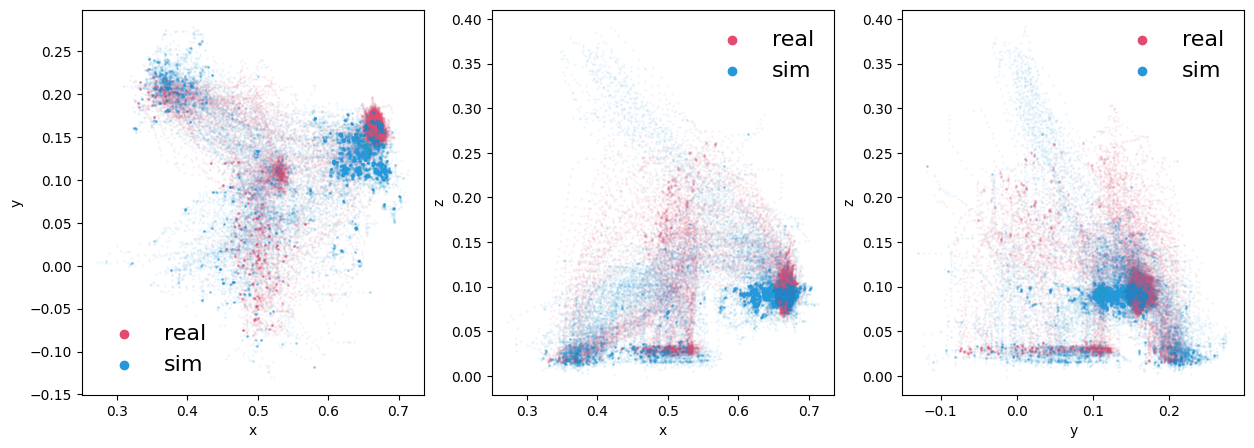

In [7]:
# More simply, plot the 3 cross-section position of the end effector for the sim and real data in one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Add some random noise to the data to make the scatter plot more readable
real_dispersed = real  # + np.random.normal(0, 0.001, real.shape)
sim_dispersed = sim  # + np.random.normal(0, 0.001, sim.shape)

plot_cross_section(axs[0], sim_dispersed, real_dispersed, [0, 1])
plot_cross_section(axs[1], sim_dispersed, real_dispersed, [0, 2])
plot_cross_section(axs[2], sim_dispersed, real_dispersed, [1, 2])

# fig.suptitle(
#     "Cross-sections of the end effector position for sim and real data", fontsize=16
# )